In [31]:
import numpy as np
import time 
import matplotlib.pyplot as plt

In [32]:
def rosenbrock(x1, x2):
    return (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2

In [ ]:
x0 = np.array([-2,2])
learning_rate = np.array([0.1, 0.01, 0.001])
ebsilon = 0.0001
max_iter = 10000

In [34]:
def compute_gradient(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([
       ( 2 * (200 * x1 ** 3 - 200 * x1 * x2 + x1 - 1)),
        200 * (x2 - x1 ** 2)
    ])

In [49]:
def gradient_descent(x0, learning_rate, max_iter, ebsilon):
    history = []
    x = x0
    for i in range(max_iter):
        grad = compute_gradient(x)
        new_x = x - learning_rate * grad
        if np.isnan(new_x).any() or np.isinf(new_x).any():
            return x, i, history
        if np.linalg.norm(grad) < ebsilon:
            return x, i , history
        
        history.append(rosenbrock(x[0], x[1]))
        x = new_x
    return x, i, history

In [50]:
def calculate_objective(x0, learning_rate_list, max_iter, ebsilon):
    times = []
    iterations = []
    gobal_min = []
    history_for_gammas = []
    
    for learning_rate in learning_rate_list:
        start = time.time()  
        x, i, history = gradient_descent(x0, learning_rate, max_iter, ebsilon) 
        end = time.time()  
        
        times.append(end - start)
        iterations.append(i)
        gobal_min.append(x)
        history_for_gammas.append(history)

    return times, iterations, gobal_min, history_for_gammas


In [62]:
times, iterations, global_min, history = calculate_objective(x0, learning_rate, max_iter, ebsilon)
objective_values = [rosenbrock(g[0], g[1]) for g in global_min]


print("Objective Values: ", objective_values)
print("Learning Rate: ", learning_rate)
print("Time: ", times)
print("Iterations: ", iterations)
print("Global Min: ", global_min)

Objective Values:  [np.float64(inf), np.float64(inf), np.float64(7.803979260967049e-05)]
Learning Rate:  [0.1   0.01  0.001]
Time:  [0.0, 0.0, 0.14551544189453125]
Iterations:  [5, 5, 9999]
Global Min:  [array([1.93799537e+242, 5.72653375e+161]), array([4.92907187e+116, 4.95260208e+077]), array([0.99117313, 0.98238866])]


C:\Users\Vasya\AppData\Local\Temp\ipykernel_26328\3542900177.py:2: RuntimeWarning: overflow encountered in scalar power
  return (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2
C:\Users\Vasya\AppData\Local\Temp\ipykernel_26328\2801697312.py:5: RuntimeWarning: overflow encountered in scalar power
  ( 2 * (200 * x1 ** 3 - 200 * x1 * x2 + x1 - 1)),
C:\Users\Vasya\AppData\Local\Temp\ipykernel_26328\2801697312.py:5: RuntimeWarning: overflow encountered in scalar multiply
  ( 2 * (200 * x1 ** 3 - 200 * x1 * x2 + x1 - 1)),
C:\Users\Vasya\AppData\Local\Temp\ipykernel_26328\2801697312.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  ( 2 * (200 * x1 ** 3 - 200 * x1 * x2 + x1 - 1)),
C:\Users\Vasya\AppData\Local\Temp\ipykernel_26328\2801697312.py:6: RuntimeWarning: overflow encountered in scalar power
  200 * (x2 - x1 ** 2)


In [67]:
print(len(history))
print(type(history))
print(len(history[0]))
print(type(history[0]))
print(len(history[1]))
print(type(history[1]))
print(len(history[2]))
print(type(history[2]))

3
<class 'list'>
5
<class 'list'>
5
<class 'list'>
10000
<class 'list'>


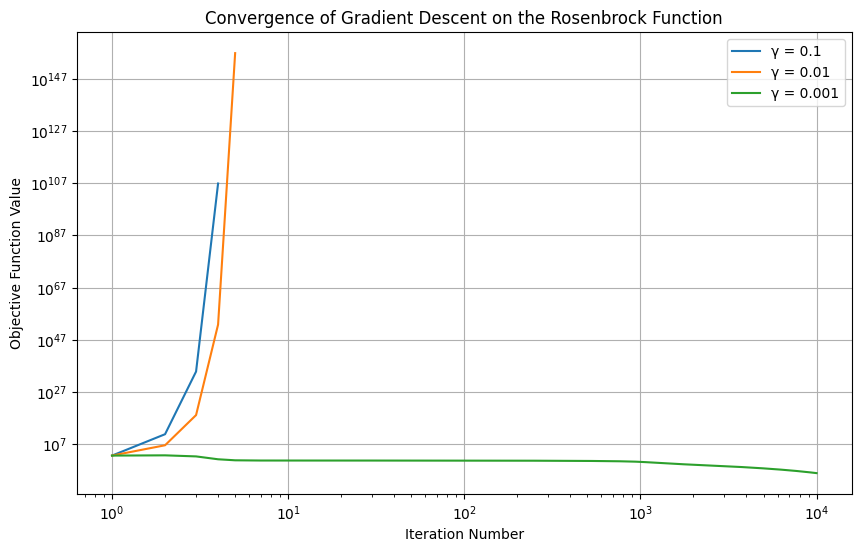

In [ ]:
plt.figure(figsize=(10, 6))

# Проходимо по кожному learning rate та відповідному списку значень функції
for i, lr in enumerate(learning_rate):
    plt.plot(range(1, len(history[i]) + 1), history[i], label=f"γ = {lr}")

plt.xscale("log")  
plt.yscale("log")  
plt.xlabel("Iteration Number")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Gradient Descent on the Rosenbrock Function")
plt.legend()
plt.grid(True)

plt.show()

### Інтерпретація результатів  

При використанні різних значень кроку $\gamma$ було зафіксовано таку поведінку алгоритму:  

1. **$\gamma = 0.1d$**  
   - На 4-й ітерації значення цільової функції різко зростає до $\approx 6.84 \times 10^{106}$.  
   - Далі відбувається переповнення (overflow), що робить подальші обчислення некоректними.  

2. **$\gamma = 0.01d$**  
   - Подібна ситуація: вже на 5-й ітерації алгоритм переходить у зону переповнення ($\approx 6.13 \times 10^{156}$).  
   - Градієнтний спуск втрачає стабільність через надто великий крок у функції Розенброка.  

3. **$\gamma = 0.001d$**  
   - Алгоритм стабільно виконує 10 000 ітерацій без переповнення.  
   - Досягає наближеного мінімуму $[0.99117313,\ 0.98238866] d$ із дуже малим значенням цільової функції $\approx 7.81 \times 10^{-5}d$.  

### Висновок  

- **Кроки $\gamma = 0.1d$ і $\gamma = 0.01d$** виявилися занадто великими: алгоритм швидко розбігається, і значення функції виходять за допустимі межі.  
- **Крок $\gamma = 0.001d$** забезпечує стабільну збіжність, проте для досягнення мінімуму потрібно виконати велику кількість ітерацій (10 000).  
- Оптимальний вибір $\gamma$ має балансувати між швидкістю збіжності та уникненням нестабільності.